# Experimental Data Analysis
This is the data from the first trial through the Google Forms. We have 2 hypotheses, gradable and non-gradable, with a control and borderline group for 4 different versions

In [217]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import shapiro,norm,ttest_ind, anderson
from itertools import product
%matplotlib inline

In [15]:
FORMS_DIR = "data"
dfs = []
for file in os.listdir(FORMS_DIR):
    print(file)
    df = pd.read_csv(FORMS_DIR+"/"+file)
    df = df.drop("Enter your Kerberos to be entered into the Amazon gift card drawing!",axis=1)
    df["pelty"]=df["Answer on a scale of 1-7, where 1 means you're certain it's not pelty and 7 means you're certain it's pelty. 4 means unsure."]
    df = df.drop("Answer on a scale of 1-7, where 1 means you're certain it's not pelty and 7 means you're certain it's pelty. 4 means unsure.",axis=1)
    df["Timestamp"]=pd.to_datetime(df["Timestamp"])
    df = df[:100]
    dfs.append((file[:-4],df))
dfs=sorted(dfs)
    

Version 2 (Control).csv
Version 3 (Borderline).csv
Version 1 (Borderline).csv
Version 4 (Control).csv


In [69]:
dfs[0][1].tail()

,Timestamp,pelty
95,2019-12-04 00:51:58-05:00,5
96,2019-12-04 01:01:40-05:00,5
97,2019-12-04 01:13:19-05:00,5
98,2019-12-04 01:28:45-05:00,5
99,2019-12-04 06:33:15-05:00,6


(array([ 4.,  3.,  6., 14., 17., 16., 10., 18., 10.,  2.]),
 array([0.04708209, 0.74723414, 1.44738618, 2.14753823, 2.84769027,
        3.54784232, 4.24799436, 4.94814641, 5.64829845, 6.3484505 ,
        7.04860254]),
 <a list of 10 Patch objects>)

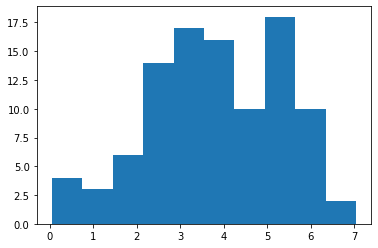

In [257]:
a = np.random.normal(4, 1.4310764472870756, size=100)
plt.hist(a)

{5: 26, 4: 21, 3: 18, 6: 17, 2: 13, 7: 4, 1: 1}
{7: 51, 6: 33, 5: 8, 1: 3, 4: 2, 2: 2, 3: 1}
{7: 40, 6: 34, 5: 19, 4: 4, 2: 2, 3: 1}
{7: 48, 6: 38, 5: 8, 4: 2, 2: 2, 1: 2}


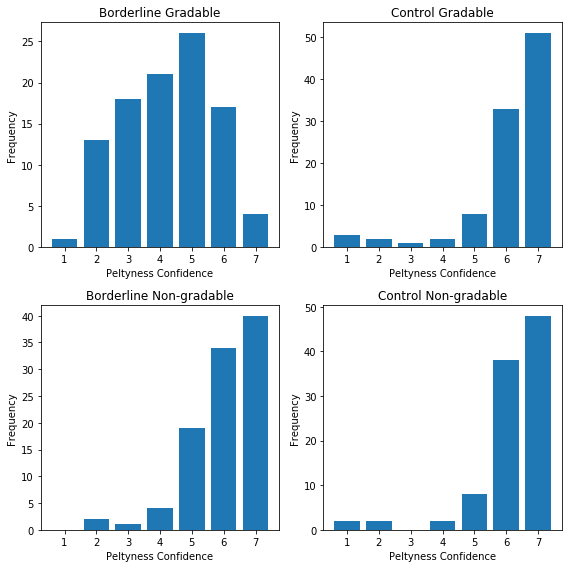

In [210]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
tups = [(0,0),(0,1),(1,0),(1,1)]
means = []
probs = []
stds = []
prob_stds = []
titles = ["Borderline Gradable", "Control Gradable", "Borderline Non-gradable", "Control Non-gradable"]
for i in range(len(dfs)):
    name,df = dfs[i]
    x,y = tups[i]
    axs[x,y].set_title(titles[i])
    axs[x,y].set_xlabel("Peltyness Confidence")
    axs[x,y].set_ylabel("Frequency")
    axs[x,y].set_xticks([1,2,3,4,5,6,7])
    
    freqs = dict(df["pelty"].value_counts())
    print(freqs)
    freq_vals = []
    for i in range(7):
        if i+1 in freqs:
            freq_vals.append(freqs[i+1])
        else:
            freq_vals.append(0)
    axs[x,y].bar(np.arange(1,8),freq_vals)
    
    means.append(df["pelty"].describe()['mean'])
    stds.append(df["pelty"].describe()["std"])    
    probs.append(((df["pelty"]-1)/6).describe()['mean'])
    prob_stds.append(((df["pelty"]-1)/6).describe()["std"])
plt.tight_layout()
plt.savefig("imgs/experimental_graphs.png")
plt.show()

In [265]:
# x = np.linspace(mean - 3*std, mean + 3*std, 100)
expected_num = []
for i in range(1,8):
    expected_num.append(100*norm.pdf(i,4.25,1.4310764472870756))

In [266]:
expected_num

[2.114977009452116,
 8.099729169952163,
 19.03598702839767,
 27.454931116626735,
 24.29994957219586,
 13.198678248581489,
 4.399421443128042]

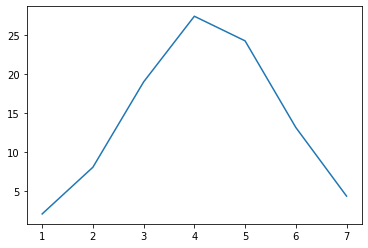

In [263]:
plt.plot(np.linspace(1,7,7),expected)

In [272]:
expected = []
for i in range(len(expected_num)):
    num = expected_num[i]
    expected = expected + int(round(num)) * [i+1]

expected = expected + [7,4,5]

(array([1, 2, 3, 4, 5, 6, 7]), array([ 2,  8, 19, 28, 25, 13,  5]))

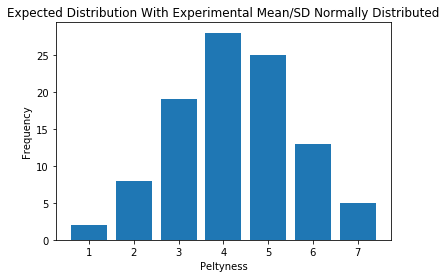

In [290]:
x,y=np.unique(np.array(expected),return_counts=True)
plt.title("Expected Distribution With Experimental Mean/SD Normally Distributed")
plt.xlabel("Peltyness")
plt.ylabel("Frequency")
plt.bar(x,y)
plt.savefig("imgs/chi_square.png")
plt.show()

(array([ 1., 13., 18., 21., 26., 17.,  4.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <a list of 7 Patch objects>)

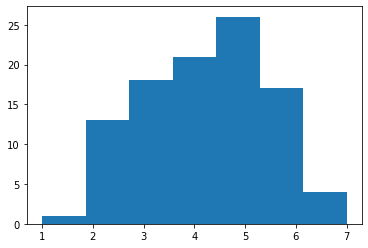

In [285]:
plt.hist(dfs[0][1]['pelty'],bins=7)

In [289]:
from scipy.stats import chisquare
chisquare(dfs[0][1]['pelty'], f_exp=expected)

Power_divergenceResult(statistic=130.33809523809526, pvalue=0.01903751680178324)

In [255]:
stds



[1.4310764472870756,
 1.3532975066163917,
 1.0822722075860272,
 1.2008414558217917]

In [214]:
prob_stds

[0.23851274121451263,
 0.22554958443606518,
 0.18037870126433778,
 0.20014024263696525]

In [161]:
dfs[0][1]['pelty'].value_counts()

5    26
4    21
3    18
6    17
2    13
7     4
1     1
Name: pelty, dtype: int64

In [219]:
anderson(dfs[0][1]['pelty'])

AndersonResult(statistic=2.442759593016632, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [224]:
anderson(dfs[3][1]['pelty'],dist='expon')

AndersonResult(statistic=33.17136414501684, critical_values=array([0.917, 1.072, 1.333, 1.596, 1.945]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [232]:
shapiro(dfs[0][1]['pelty'])

(0.9389769434928894, 0.0001670823257882148)

In [247]:
dfs[0][1]['pelty'].describe()

count    100.000000
mean       4.250000
std        1.431076
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: pelty, dtype: float64

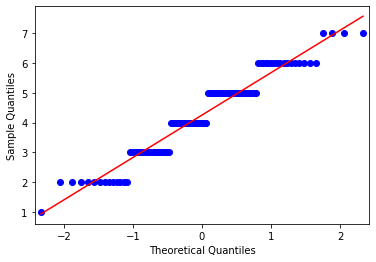

In [251]:
from statsmodels.graphics.gofplots import qqplot
qqplot(dfs[0][1]['pelty'],line='s')
plt.savefig("imgs/qq.png")

(array([ 1.,  0.,  0., 13.,  0., 18.,  0., 21., 26., 21.]),
 array([0.        , 0.19459101, 0.38918203, 0.58377304, 0.77836406,
        0.97295507, 1.16754609, 1.3621371 , 1.55672812, 1.75131913,
        1.94591015]),
 <a list of 10 Patch objects>)

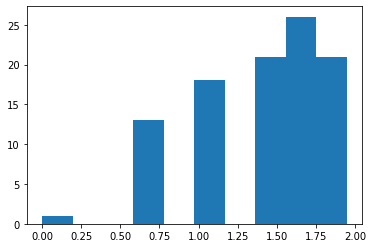

In [236]:
plt.hist(np.log(dfs[0][1]['pelty']))

In [163]:
mean = means[0]
std = stds[0]
mean,std

(4.25, 1.4310764472870756)

2.114977009452116

{5: 26, 4: 21, 3: 18, 6: 17, 2: 13, 7: 4, 1: 1}


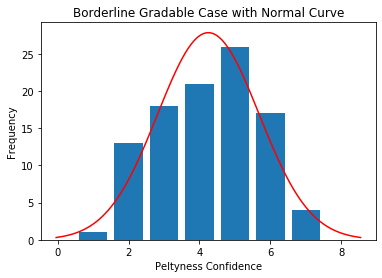

In [292]:
df = dfs[0][1]
freqs = dict(df["pelty"].value_counts())
print(freqs)
freq_vals = []
for i in range(7):
    if i+1 in freqs:
        freq_vals.append(freqs[i+1])
    else:
        freq_vals.append(0)
plt.bar(np.arange(1,8),freq_vals)
plt.ylabel("Frequency")
plt.xlabel("Peltyness Confidence")
plt.title("Borderline Gradable Case with Normal Curve")
x = np.linspace(mean - 3*std, mean + 3*std, 100)
plt.plot(x,100*norm.pdf(x,mean,std),color='r')
plt.savefig("imgs/shapiro.png")
plt.show()

In [165]:
(4.274336283185841-1)/6

0.5457227138643068

In [166]:
(6.12396694214876-1)/6

0.8539944903581267

In [167]:
probs = [(m-1)/6 for m in means]

In [168]:
probs

[0.5416666666666666, 0.855, 0.8366666666666666, 0.8633333333333333]

In [169]:
yerr = np.array([[0,0],[1,1],[2,2],[3,3]]).T
yerr.shape

(2, 4)

In [204]:
varss = [s**2 for s in stds]
varss

[2.047979797979798, 1.8314141414141427, 1.1713131313131326, 1.4420202020202]

In [205]:
varss_norm = [v/6 for v in varss]
varss_norm

[0.3413299663299663, 0.30523569023569047, 0.19521885521885543, 0.2403367003367]

In [207]:
[v**0.5 for v in varss_norm]

[0.5842345131280472,
 0.5524813935651502,
 0.44183577856354667,
 0.4902414714573829]

In [208]:
[s/6**0.5 for s in stds]

[0.5842345131280472, 0.5524813935651504, 0.4418357785635467, 0.490241471457383]

In [171]:
means

[4.25, 6.13, 6.02, 6.18]

In [172]:
computational_results = [.34078, .99268, .97422, .99718] 

In [173]:
probs

[0.5416666666666666, 0.855, 0.8366666666666666, 0.8633333333333333]

In [174]:
hypotheses = ['Borderline\nGradable','Control\nGradable','Borderline\nNon-gradable','Control\nNon-gradable']
groups = ['Experimental', 'Computational']
lst = []
for tup in list(product(hypotheses,groups)):
    h,g = tup
    index = hypotheses.index(h)
    if g == "Experimental":
        value = probs[index]
    else:
        value = computational_results[index]
    lst.append([h,g,value])




In [192]:
means

[4.25, 6.13, 6.02, 6.18]

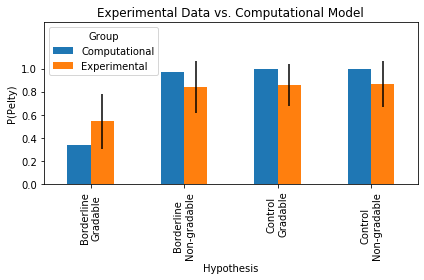

In [216]:
df = pd.DataFrame(lst,columns=['Hypothesis','Group','Value'])
df.pivot('Hypothesis','Group','Value').plot(kind='bar',yerr=np.array([[0,0,0,0],prob_stds]))
plt.ylim(0,1.4)
plt.yticks(np.arange(6)/5)
plt.title("Experimental Data vs. Computational Model")
plt.ylabel("P(Pelty)")
plt.tight_layout()
plt.savefig("imgs/exp_vs_comp.png")
plt.show()

In [215]:
prob_stds

[0.23851274121451263,
 0.22554958443606518,
 0.18037870126433778,
 0.20014024263696525]

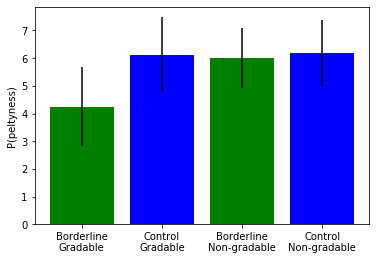

In [198]:
plt.bar(['Borderline\nGradable','Control\nGradable','Borderline\nNon-gradable','Control\nNon-gradable'],means,color=['g','b','g','b'],yerr=[s for s in stds])
# plt.ylim(0,1)
plt.ylabel("P(peltyness)")
# plt.errorbar(1,0.54,0.4)
# add error bars
# statisical significant
# 1 star = .05, 2 star = .01, 3 star = .001
plt.savefig("imgs/average_exp.png")
plt.show()

In [65]:
# plot model outputs

# Hypothesis Testing

In [187]:
ttest_ind(dfs[2][1]['pelty'],dfs[3][1]['pelty'],equal_var=False)

Ttest_indResult(statistic=-0.9897433186107879, pvalue=0.32352049977012387)